### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 10
popsize = 20
generations = 1000
name = 'centered5'
#device = torch.device('mps:0')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize)

2023-02-14 13:29:20,870	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-14 13:29:23] INFO     <12297> evotorch.core: Instance of `Custom_NEProblem` (id:4422740976) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-14 13:29:23] INFO     <12297> evotorch.core: Instance of `Custom_NEProblem` (id:4422740976) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-14 13:29:23] INFO     <12297> evotorch.core: Instance of `Custom_NEProblem` (id:4422740976) -- The `device` of the problem is set as cpu
[2023-02-14 13:29:23] INFO     <12297> evotorch.core: Instance of `Custom_NEProblem` (id:4422740976) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-14 13:29:23] INFO     <12297> evotorch.core: Instance of `Custom_NEProblem` (id:4422740976) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0967)
pop_best_eval : -2489.4072265625
  median_eval : -2611.396484375
    mean_eval : -2612.625

         iter : 2
     stepsize : ReadOnlyTensor(0.0944)
pop_best_eval : -2799.71142578125
  median_eval : -2906.889892578125
    mean_eval : -2900.2255859375

         iter : 3
     stepsize : ReadOnlyTensor(0.0927)
pop_best_eval : -1045.9315185546875
  median_eval : -1242.2042236328125
    mean_eval : -1227.3924560546875

         iter : 4
     stepsize : ReadOnlyTensor(0.0913)
pop_best_eval : -1261.79052734375
  median_eval : -2541.74462890625
    mean_eval : -2447.28759765625

         iter : 5
     stepsize : ReadOnlyTensor(0.0903)
pop_best_eval : -1335.1695556640625
  median_eval : -2375.41455078125
    mean_eval : -2157.045654296875

         iter : 6
     stepsize : ReadOnlyTensor(0.0894)
pop_best_eval : -1050.857421875
  median_eval : -2102.06787109375
    mean_eval : -1949.8668212890625

         iter : 7
     stepsize : ReadOnly

In [4]:
network = trainer.get_trained_network()

In [5]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'])

#### Visualize trained network

In [14]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer()
network(graph, 0)

(Data(x=[40, 5], edge_index=[1, 0], device=cpu, attr=[1]),
 tensor([0., 0.]),
 0.0,
 0.0,
 0.0)

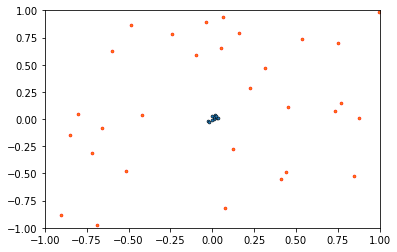

In [15]:
anim = visualizer.animate_organism(graph, network, food=30, frames=300)
visualizer.save_animation_to_gif(anim, name, 10)

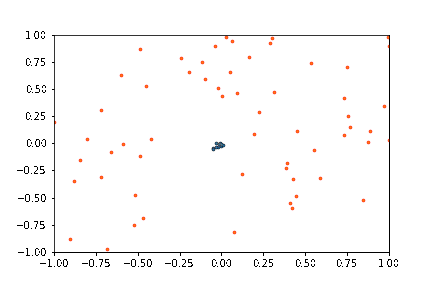

In [18]:
Image('../animation/' + name + '.gif')

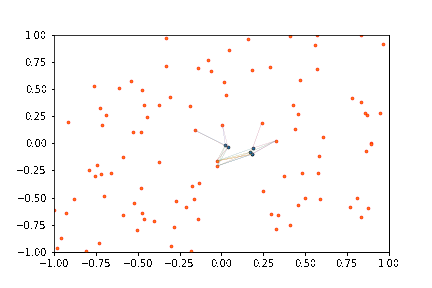

In [9]:
Image('../animation/GATConv1.gif')

In [10]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [11]:
print(network)

GATConv(
  (conv_layers): GATv2Conv(5, 5, heads=1)
  (mlp): Sequential(
    (0): ReLU()
    (1): Linear(in_features=5, out_features=5, bias=True)
    (2): ReLU()
    (3): Linear(in_features=5, out_features=2, bias=True)
    (4): ReLU()
  )
)


In [12]:
print(network.conv_layers)
for param in network.conv_layers.parameters():
  print(param.data)

GATv2Conv(5, 5, heads=1)
tensor([[[-0.1467,  1.3520, -1.0561, -0.8781, -0.2138]]])
tensor([ 0.6151, -0.6145,  0.5022, -0.5185,  1.3829])
tensor([[-2.3956, -1.0478, -1.4031, -0.1578,  1.4883],
        [ 0.2458,  1.1435,  0.9398, -1.2734,  1.0261],
        [ 1.5192, -1.6030,  0.9557,  1.0193, -0.6703],
        [ 0.1177, -1.2070, -1.2663, -0.9757,  0.4490],
        [ 0.5494,  1.0281,  1.0825,  0.0959,  2.9540]])
tensor([ 1.4166,  1.1910,  1.0768,  0.6128, -1.9569])
tensor([[-1.3182, -0.1207,  0.4099,  0.2670,  0.6680],
        [-1.2082, -3.2962,  1.2661, -0.1294,  0.9938],
        [ 0.1768, -0.7525, -0.8179,  0.4476,  0.3168],
        [ 0.0967, -0.8872, -0.5418,  0.3120, -0.0139],
        [-1.6248, -0.3055,  0.1810, -1.2653,  0.5285]])
tensor([ 0.2423,  1.4374, -1.6683,  0.3478,  0.9497])
tensor([[ 0.5879, -0.3102,  1.0084,  0.0576],
        [ 0.5792, -0.4953,  0.1992,  0.8468],
        [ 1.5409, -1.4588,  0.8468, -0.0448],
        [-0.1315,  0.0175,  0.2405, -0.6193],
        [ 1.3112,  

In [13]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>